In [129]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import plotly.express as px
import pprint
import operator
import scipy.stats as stats
import pylab as py

In [2]:
# read in data and subset for desired features 
dogs_df = pd.read_csv('dogs (3).csv')
dogs_df = dogs_df[['id', 'delta_time_minutes', 'age', 'gender', 'size', 'coat', 'primary_breed', 'primary_color', 'compatible_children', 'compatible_dogs', 'compatible_cats']]

# drop null values and reset index
dogs_df.dropna(inplace=True)
dogs_df.reset_index()
dogs_df

,id,delta_time_minutes,age,gender,size,coat,primary_breed,primary_color,compatible_children,compatible_dogs,compatible_cats
0,59313263,1213.833333,Adult,Male,Small,Short,Chihuahua,Yellow / Tan / Blond / Fawn,True,True,True
2,59313253,733.033333,Young,Male,Medium,Medium,Shetland Sheepdog / Sheltie,Merle (Blue),False,True,True
8,59313185,1269.450000,Young,Female,Large,Short,Anatolian Shepherd,Bicolor,True,True,True
10,59263354,1127.616667,Baby,Female,Medium,Short,Coonhound,Black,True,True,True
11,59313109,119.766667,Young,Male,Medium,Short,Beagle,"Tricolor (Brown, Black, & White)",True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4923,59262866,23.766667,Young,Female,Medium,Short,Pit Bull Terrier,Black,True,True,True
4927,59262859,872.433333,Young,Male,Medium,Long,Goldendoodle,Golden,True,True,True
4930,59262849,1288.566667,Baby,Female,Medium,Medium,German Shepherd Dog,Black,True,True,False
4931,59262848,1272.966667,Senior,Male,Large,Short,Black Labrador Retriever,Black,True,True,True


In [3]:
# make dummy columns 
dogs_df_dummies = pd.get_dummies(data=dogs_df, 
                                 columns=['age', 'gender', 'size', 'coat', 'primary_breed','primary_color'])

In [4]:
def random_forest_regress_default(x_feat_list, y_col, df): 
    """Takes in dataframe and list of x features used to build random forest regressor predicting y column 
        values. Random Forest Regressor is initialized to have default arguments only
    
        Args: 
            x_feat_list(list): List of column names in dataframe to be used as x features in model 
            y_col (string): String of column name in dataframe to be used as y values in model
            df (dataframe): A pandas dataframe containing the data to build the model
            
        Returns: 
            feat_importances (list): A list of the feature importance of each feature used in the model 
            converted_dict (dictionary): A dictionary with the feature as the key and the feature importance of 
                                         that feature as the value
            r2 (float): The R2 score of the model 
            mse (float): The MSE of the model  
            residuals (array): A numpy array with the residuals of the model (errors)
    """

    # split into x and y data
    X = df.loc[:, x_feat_list].values
    y = df.loc[:, y_col].values

    # split into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

    # initialize random forest regressor 
    regressor = RandomForestRegressor()

    # fit random forest regressor
    regressor.fit(X_train, y_train)

    # predict using regressor 
    y_pred = regressor.predict(X_test)
    
    # calculate accuracy scores 
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # build dictionary of model features and their importances 
    feat_importances = regressor.feature_importances_
    feat_import_dict = {}
    for index, item in enumerate(feat_importances):
        feat = x_feat_list[index]
        feat_import_dict[feat] = item 
    
    # sort dictionary in descending order 
    sorted_feat_import_dict = sorted(feat_import_dict.items(), key=lambda x:x[1], reverse=True)
    converted_dict = dict(sorted_feat_import_dict)
    
    # calculate residuals 
    residuals = y_test - y_pred
    
    return feat_importances, converted_dict, r2, mse, residuals

In [5]:
def random_forest_regress(x_feat_list, y_col, df): 
    """Takes in dataframe and list of x features used to build random forest regressor predicting y column 
        values. Random Forest Regressor is initialized with some arguments changed from defaults.
    
        Args: 
            x_feat_list(list): List of column names in dataframe to be used as x features in model 
            y_col (string): String of column name in dataframe to be used as y values in model
            df (dataframe): A pandas dataframe containing the data to build the model
            
        Returns: 
            feat_importances (list): A list of the feature importance of each feature used in the model 
            converted_dict (dictionary): A dictionary with the feature as the key and the feature importance of 
                                         that feature as the value
            r2 (float): The R2 score of the model 
            mse (float): The MSE of the model  
            residuals (array): A numpy array with the residuals of the model (errors)
    """


    # split into x and y data
    X = df.loc[:, x_feat_list].values
    y = df.loc[:, y_col].values

    # split into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

    # initialize random forest regressor 
    regressor = RandomForestRegressor(n_estimators=100, 
                                     bootstrap=True, oob_score=True, random_state=42)

    # fit random forest regressor
    regressor.fit(X_train, y_train)

    # predict using regressor 
    y_pred = regressor.predict(X_test)
    
    # calculate accuracy scores 
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # build dictionary of model features and their importances 
    feat_importances = regressor.feature_importances_
    feat_import_dict = {}
    for index, item in enumerate(feat_importances):
        feat = x_feat_list[index]
        feat_import_dict[feat] = item 
    
    # sort dictionary in descending order 
    sorted_dict = dict(sorted(feat_import_dict.items(), key=lambda item: item[1], reverse=True))

    
    # calculate residuals
    residuals = y_test - y_pred
    
    return feat_importances, sorted_dict, r2, mse, residuals

### Test 1a: All X Features
Using original regressor function (random_forest_regress), which passes non-default arguments to random forest regressor model upon initialization.

In [6]:
# define x_feat_list as all the possible features in the model (columns in dataframe) 
x_feat_list = ['compatible_children', 'compatible_dogs', 'compatible_cats', 
               'age_Adult', 'age_Baby', 'age_Senior', 'age_Young', 'gender_Female', 'gender_Male', 
               'size_Extra Large', 'size_Large', 'size_Medium', 'size_Small', 'coat_Curly', 'coat_Hairless', 
               'coat_Long', 'coat_Medium', 'coat_Short', 'coat_Wire', 'primary_breed_Affenpinscher', 
               'primary_breed_Alaskan Malamute', 'primary_breed_American Bulldog', 
               'primary_breed_American Bully', 'primary_breed_American Eskimo Dog', 
               'primary_breed_American Staffordshire Terrier', 'primary_breed_Anatolian Shepherd', 
               'primary_breed_Aussiedoodle', 'primary_breed_Australian Cattle Dog / Blue Heeler', 
               'primary_breed_Australian Kelpie', 'primary_breed_Australian Shepherd', 
               'primary_breed_Australian Terrier', 'primary_breed_Basset Hound', 'primary_breed_Beagle', 
               'primary_breed_Belgian Shepherd / Malinois', 'primary_breed_Bernese Mountain Dog', 
               'primary_breed_Bichon Frise', 'primary_breed_Black Labrador Retriever', 
               'primary_breed_Black Mouth Cur', 'primary_breed_Bloodhound', 'primary_breed_Blue Lacy', 
               'primary_breed_Border Collie', 'primary_breed_Border Terrier', 'primary_breed_Boston Terrier', 
               'primary_breed_Boxer', 'primary_breed_Brussels Griffon', 'primary_breed_Cairn Terrier', 
               'primary_breed_Carolina Dog', 'primary_breed_Catahoula Leopard Dog', 'primary_breed_Cattle Dog', 
               'primary_breed_Cavalier King Charles Spaniel', 'primary_breed_Chihuahua', 
               'primary_breed_Chinese Crested Dog', 'primary_breed_Chiweenie', 'primary_breed_Chocolate Labrador Retriever', 
               'primary_breed_Chow Chow', 'primary_breed_Cocker Spaniel', 'primary_breed_Collie', 'primary_breed_Coonhound', 
               'primary_breed_Corgi', 'primary_breed_Dachshund', 'primary_breed_Dalmatian', 
               'primary_breed_Doberman Pinscher', 'primary_breed_Dogo Argentino', 'primary_breed_Dutch Shepherd', 
               'primary_breed_English Bulldog', 'primary_breed_English Coonhound', 'primary_breed_English Setter', 
               'primary_breed_English Shepherd', 'primary_breed_Entlebucher', 'primary_breed_Feist', 
               'primary_breed_Flat-Coated Retriever', 'primary_breed_Fox Terrier', 'primary_breed_Foxhound', 
               'primary_breed_French Bulldog', 'primary_breed_German Shepherd Dog', 'primary_breed_German Wirehaired Pointer', 
               'primary_breed_Golden Retriever', 'primary_breed_Goldendoodle', 'primary_breed_Great Dane', 
               'primary_breed_Great Pyrenees', 'primary_breed_Greyhound', 'primary_breed_Hound', 'primary_breed_Husky', 
               'primary_breed_Ibizan Hound', 'primary_breed_Icelandic Sheepdog', 'primary_breed_Irish Terrier', 
               'primary_breed_Italian Greyhound', 'primary_breed_Jack Russell Terrier', 'primary_breed_Japanese Chin', 
               'primary_breed_Labradoodle', 'primary_breed_Labrador Retriever', 'primary_breed_Lhasa Apso', 
               'primary_breed_Maltese', 'primary_breed_Maltipoo', 'primary_breed_Mastiff', 'primary_breed_Miniature Dachshund', 
               'primary_breed_Miniature Pinscher', 'primary_breed_Miniature Poodle', 'primary_breed_Miniature Schnauzer', 
               'primary_breed_Mixed Breed', 'primary_breed_Mountain Cur', 'primary_breed_Newfoundland Dog', 
               'primary_breed_Norfolk Terrier', 'primary_breed_Old English Sheepdog', 'primary_breed_Parson Russell Terrier', 
               'primary_breed_Patterdale Terrier / Fell Terrier', 'primary_breed_Pekingese', 'primary_breed_Pharaoh Hound', 
               'primary_breed_Pit Bull Terrier', 'primary_breed_Pointer', 'primary_breed_Pomeranian', 'primary_breed_Poodle', 
               'primary_breed_Pug', 'primary_breed_Rat Terrier', 'primary_breed_Retriever', 'primary_breed_Rhodesian Ridgeback', 
               'primary_breed_Rottweiler', 'primary_breed_Saluki', 'primary_breed_Schnauzer', 'primary_breed_Shar-Pei', 
               'primary_breed_Shepherd', 'primary_breed_Shetland Sheepdog / Sheltie', 'primary_breed_Shiba Inu', 
               'primary_breed_Shih Tzu', 'primary_breed_Siberian Husky', 'primary_breed_Spaniel', 
               'primary_breed_Staffordshire Bull Terrier', 'primary_breed_Standard Poodle', 'primary_breed_Terrier', 
               'primary_breed_Tibetan Terrier', 'primary_breed_Vizsla', 'primary_breed_Weimaraner', 'primary_breed_Whippet', 
               'primary_breed_White German Shepherd', 'primary_breed_Wirehaired Terrier', 'primary_breed_Xoloitzcuintli / Mexican Hairless', 
               'primary_breed_Yellow Labrador Retriever', 'primary_breed_Yorkshire Terrier', 'primary_color_Apricot / Beige', 
               'primary_color_Bicolor', 'primary_color_Black', 'primary_color_Brindle', 'primary_color_Brown / Chocolate', 
               'primary_color_Golden', 'primary_color_Gray / Blue / Silver', 'primary_color_Harlequin', 
               'primary_color_Merle (Blue)', 'primary_color_Merle (Red)', 'primary_color_Red / Chestnut / Orange', 
               'primary_color_Sable', 'primary_color_Tricolor (Brown, Black, & White)', 'primary_color_White / Cream', 
               'primary_color_Yellow / Tan / Blond / Fawn']

# run random forest regressor using non-default model 
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress(x_feat_list=x_feat_list, y_col='delta_time_minutes', df=dogs_df_dummies)

In [7]:
# print feature importance dictionary
pprint.pprint(feat_import_dict)

{'age_Adult': 0.02395360426843699,
 'age_Baby': 0.030174291595549567,
 'age_Senior': 0.011958386024141452,
 'age_Young': 0.021450474868300793,
 'coat_Curly': 0.005366294826378979,
 'coat_Hairless': 0.0010517067100437527,
 'coat_Long': 0.013282187553526927,
 'coat_Medium': 0.023010828057869283,
 'coat_Short': 0.019846155419057064,
 'coat_Wire': 0.006228527423659871,
 'compatible_cats': 0.021746292527822644,
 'compatible_children': 0.005314925890490117,
 'compatible_dogs': 0.006637048851091096,
 'gender_Female': 0.025633660779341278,
 'gender_Male': 0.02525875060855213,
 'primary_breed_Affenpinscher': 0.0011428693904000765,
 'primary_breed_Alaskan Malamute': 0.00012415025623410333,
 'primary_breed_American Bulldog': 0.0070389677943720665,
 'primary_breed_American Bully': 0.003907157455578684,
 'primary_breed_American Eskimo Dog': 0.001285733663046808,
 'primary_breed_American Staffordshire Terrier': 0.009931632063633806,
 'primary_breed_Anatolian Shepherd': 0.002316414315456361,
 'primar

In [8]:
print(f'''For original random forest regressor function:\nR2: {r2}, MSE: {mse}''')

For original random forest regressor function:
R2: -0.14361363071107403, MSE: 266444.4669252232


### Test 1b: All X Features
Using default regressor function (random_forest_regress_default), which uses default arguments to initialize the random forest regressor model.
- Note that Default regressor function is used for the rest of this analysis as it yields better accuracy metrics

In [9]:
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress_default(x_feat_list=x_feat_list, y_col='delta_time_minutes', df=dogs_df_dummies)
print(f'''For default random forest regressor function:\nR2: {r2}, MSE: {mse}''')

For default random forest regressor function:
R2: -0.1304239463831447, MSE: 263371.47241440933


In [10]:
pprint.pprint(feat_import_dict)

{'age_Adult': 0.02394334597071881,
 'age_Baby': 0.03162537213014921,
 'age_Senior': 0.012563302596347938,
 'age_Young': 0.02402749255255546,
 'coat_Curly': 0.004696072360197436,
 'coat_Hairless': 0.0009654011362537067,
 'coat_Long': 0.013715873848424303,
 'coat_Medium': 0.02304429283460312,
 'coat_Short': 0.019644825129121465,
 'coat_Wire': 0.005587096907847453,
 'compatible_cats': 0.02018483784672507,
 'compatible_children': 0.006155873674461105,
 'compatible_dogs': 0.008592726262430194,
 'gender_Female': 0.02572973723020355,
 'gender_Male': 0.026063529044012178,
 'primary_breed_Affenpinscher': 0.0013586484666292212,
 'primary_breed_Alaskan Malamute': 0.00020160080279138826,
 'primary_breed_American Bulldog': 0.006620028381592764,
 'primary_breed_American Bully': 0.003014743139494352,
 'primary_breed_American Eskimo Dog': 0.0012091107382523978,
 'primary_breed_American Staffordshire Terrier': 0.010920113174865019,
 'primary_breed_Anatolian Shepherd': 0.0019465063481900829,
 'primary_b

In [12]:
px.bar(x=x_feat_list, y=feature_importances, title='Feature Importances of Features in Random Forest Regressor', labels={'x': 'Features', 'y':'Feature Importances'}).update_xaxes(categoryorder='total descending')

In [25]:
# make a list of 15 features with highest feature importance 
top_15_feats = ['age_Baby', 'gender_Female', 'primary_color_White / Cream', 
                'primary_color_Tricolor (Brown, Black, & White)', 'compatible_cats', 
                'primary_color_Red / Chestnut / Orange', 'primary_color_Yellow / Tan / Blond / Fawn', 
                'primary_breed_Terrier', 'primary_breed_Hound', 'primary_color_Gray / Blue / Silver', 
                'primary_breed_Corgi', 'age_Senior', 'primary_breed_American Staffordshire Terrier', 
                'primary_breed_Boxer', 'compatible_dogs']
pprint.pprint(top_15_feats)

['age_Baby',
 'gender_Female',
 'primary_color_White / Cream',
 'primary_color_Tricolor (Brown, Black, & White)',
 'compatible_cats',
 'primary_color_Red / Chestnut / Orange',
 'primary_color_Yellow / Tan / Blond / Fawn',
 'primary_breed_Terrier',
 'primary_breed_Hound',
 'primary_color_Gray / Blue / Silver',
 'primary_breed_Corgi',
 'age_Senior',
 'primary_breed_American Staffordshire Terrier',
 'primary_breed_Boxer',
 'compatible_dogs']


In [ ]:
x_feat_list = ['compatible_children', 'compatible_dogs', 'compatible_cats', 
               'age_Adult', 'age_Baby', 'age_Senior', 'age_Young', 'gender_Female', 'gender_Male', 
               'size_Extra Large', 'size_Large', 'size_Medium', 'size_Small', 'coat_Curly', 'coat_Hairless', 
               'coat_Long', 'coat_Medium', 'coat_Short', 'coat_Wire', 'primary_breed_Affenpinscher', 
               'primary_breed_Alaskan Malamute', 'primary_breed_American Bulldog', 
               'primary_breed_American Bully', 'primary_breed_American Eskimo Dog', 
               'primary_breed_American Staffordshire Terrier', 'primary_breed_Anatolian Shepherd', 
               'primary_breed_Aussiedoodle', 'primary_breed_Australian Cattle Dog / Blue Heeler', 
               'primary_breed_Australian Kelpie', 'primary_breed_Australian Shepherd', 
               'primary_breed_Australian Terrier', 'primary_breed_Basset Hound', 'primary_breed_Beagle', 
               'primary_breed_Belgian Shepherd / Malinois', 'primary_breed_Bernese Mountain Dog', 
               'primary_breed_Bichon Frise', 'primary_breed_Black Labrador Retriever', 
               'primary_breed_Black Mouth Cur', 'primary_breed_Bloodhound', 'primary_breed_Blue Lacy', 
               'primary_breed_Border Collie', 'primary_breed_Border Terrier', 'primary_breed_Boston Terrier', 
               'primary_breed_Boxer', 'primary_breed_Brussels Griffon', 'primary_breed_Cairn Terrier', 
               'primary_breed_Carolina Dog', 'primary_breed_Catahoula Leopard Dog', 'primary_breed_Cattle Dog', 
               'primary_breed_Cavalier King Charles Spaniel', 'primary_breed_Chihuahua', 
               'primary_breed_Chinese Crested Dog', 'primary_breed_Chiweenie', 'primary_breed_Chocolate Labrador Retriever', 
               'primary_breed_Chow Chow', 'primary_breed_Cocker Spaniel', 'primary_breed_Collie', 'primary_breed_Coonhound', 
               'primary_breed_Corgi', 'primary_breed_Dachshund', 'primary_breed_Dalmatian', 
               'primary_breed_Doberman Pinscher', 'primary_breed_Dogo Argentino', 'primary_breed_Dutch Shepherd', 
               'primary_breed_English Bulldog', 'primary_breed_English Coonhound', 'primary_breed_English Setter', 
               'primary_breed_English Shepherd', 'primary_breed_Entlebucher', 'primary_breed_Feist', 
               'primary_breed_Flat-Coated Retriever', 'primary_breed_Fox Terrier', 'primary_breed_Foxhound', 
               'primary_breed_French Bulldog', 'primary_breed_German Shepherd Dog', 'primary_breed_German Wirehaired Pointer', 
               'primary_breed_Golden Retriever', 'primary_breed_Goldendoodle', 'primary_breed_Great Dane', 
               'primary_breed_Great Pyrenees', 'primary_breed_Greyhound', 'primary_breed_Hound', 'primary_breed_Husky', 
               'primary_breed_Ibizan Hound', 'primary_breed_Icelandic Sheepdog', 'primary_breed_Irish Terrier', 
               'primary_breed_Italian Greyhound', 'primary_breed_Jack Russell Terrier', 'primary_breed_Japanese Chin', 
               'primary_breed_Labradoodle', 'primary_breed_Labrador Retriever', 'primary_breed_Lhasa Apso', 
               'primary_breed_Maltese', 'primary_breed_Maltipoo', 'primary_breed_Mastiff', 'primary_breed_Miniature Dachshund', 
               'primary_breed_Miniature Pinscher', 'primary_breed_Miniature Poodle', 'primary_breed_Miniature Schnauzer', 
               'primary_breed_Mixed Breed', 'primary_breed_Mountain Cur', 'primary_breed_Newfoundland Dog', 
               'primary_breed_Norfolk Terrier', 'primary_breed_Old English Sheepdog', 'primary_breed_Parson Russell Terrier', 
               'primary_breed_Patterdale Terrier / Fell Terrier', 'primary_breed_Pekingese', 'primary_breed_Pharaoh Hound', 
               'primary_breed_Pit Bull Terrier', 'primary_breed_Pointer', 'primary_breed_Pomeranian', 'primary_breed_Poodle', 
               'primary_breed_Pug', 'primary_breed_Rat Terrier', 'primary_breed_Retriever', 'primary_breed_Rhodesian Ridgeback', 
               'primary_breed_Rottweiler', 'primary_breed_Saluki', 'primary_breed_Schnauzer', 'primary_breed_Shar-Pei', 
               'primary_breed_Shepherd', 'primary_breed_Shetland Sheepdog / Sheltie', 'primary_breed_Shiba Inu', 
               'primary_breed_Shih Tzu', 'primary_breed_Siberian Husky', 'primary_breed_Spaniel', 
               'primary_breed_Staffordshire Bull Terrier', 'primary_breed_Standard Poodle', 'primary_breed_Terrier', 
               'primary_breed_Tibetan Terrier', 'primary_breed_Vizsla', 'primary_breed_Weimaraner', 'primary_breed_Whippet', 
               'primary_breed_White German Shepherd', 'primary_breed_Wirehaired Terrier', 'primary_breed_Xoloitzcuintli / Mexican Hairless', 
               'primary_breed_Yellow Labrador Retriever', 'primary_breed_Yorkshire Terrier', 'primary_color_Apricot / Beige', 
               'primary_color_Bicolor', 'primary_color_Black', 'primary_color_Brindle', 'primary_color_Brown / Chocolate', 
               'primary_color_Golden', 'primary_color_Gray / Blue / Silver', 'primary_color_Harlequin', 
               'primary_color_Merle (Blue)', 'primary_color_Merle (Red)', 'primary_color_Red / Chestnut / Orange', 
               'primary_color_Sable', 'primary_color_Tricolor (Brown, Black, & White)', 'primary_color_White / Cream', 
               'primary_color_Yellow / Tan / Blond / Fawn']

### Test 2: X Data only looking at Breeds 

In [72]:
x_feat_list_breeds = ['primary_breed_Affenpinscher', 
               'primary_breed_Alaskan Malamute', 'primary_breed_American Bulldog', 
               'primary_breed_American Bully', 'primary_breed_American Eskimo Dog', 
               'primary_breed_American Staffordshire Terrier', 'primary_breed_Anatolian Shepherd', 
               'primary_breed_Aussiedoodle', 'primary_breed_Australian Cattle Dog / Blue Heeler', 
               'primary_breed_Australian Kelpie', 'primary_breed_Australian Shepherd', 
               'primary_breed_Australian Terrier', 'primary_breed_Basset Hound', 'primary_breed_Beagle', 
               'primary_breed_Belgian Shepherd / Malinois', 'primary_breed_Bernese Mountain Dog', 
               'primary_breed_Bichon Frise', 'primary_breed_Black Labrador Retriever', 
               'primary_breed_Black Mouth Cur', 'primary_breed_Bloodhound', 'primary_breed_Blue Lacy', 
               'primary_breed_Border Collie', 'primary_breed_Border Terrier', 'primary_breed_Boston Terrier', 
               'primary_breed_Boxer', 'primary_breed_Brussels Griffon', 'primary_breed_Cairn Terrier', 
               'primary_breed_Carolina Dog', 'primary_breed_Catahoula Leopard Dog', 'primary_breed_Cattle Dog', 
               'primary_breed_Cavalier King Charles Spaniel', 'primary_breed_Chihuahua', 
               'primary_breed_Chinese Crested Dog', 'primary_breed_Chiweenie', 'primary_breed_Chocolate Labrador Retriever', 
               'primary_breed_Chow Chow', 'primary_breed_Cocker Spaniel', 'primary_breed_Collie', 'primary_breed_Coonhound', 
               'primary_breed_Corgi', 'primary_breed_Dachshund', 'primary_breed_Dalmatian', 
               'primary_breed_Doberman Pinscher', 'primary_breed_Dogo Argentino', 'primary_breed_Dutch Shepherd', 
               'primary_breed_English Bulldog', 'primary_breed_English Coonhound', 'primary_breed_English Setter', 
               'primary_breed_English Shepherd', 'primary_breed_Entlebucher', 'primary_breed_Feist', 
               'primary_breed_Flat-Coated Retriever', 'primary_breed_Fox Terrier', 'primary_breed_Foxhound', 
               'primary_breed_French Bulldog', 'primary_breed_German Shepherd Dog', 'primary_breed_German Wirehaired Pointer', 
               'primary_breed_Golden Retriever', 'primary_breed_Goldendoodle', 'primary_breed_Great Dane', 
               'primary_breed_Great Pyrenees', 'primary_breed_Greyhound', 'primary_breed_Hound', 'primary_breed_Husky', 
               'primary_breed_Ibizan Hound', 'primary_breed_Icelandic Sheepdog', 'primary_breed_Irish Terrier', 
               'primary_breed_Italian Greyhound', 'primary_breed_Jack Russell Terrier', 'primary_breed_Japanese Chin', 
               'primary_breed_Labradoodle', 'primary_breed_Labrador Retriever', 'primary_breed_Lhasa Apso', 
               'primary_breed_Maltese', 'primary_breed_Maltipoo', 'primary_breed_Mastiff', 'primary_breed_Miniature Dachshund', 
               'primary_breed_Miniature Pinscher', 'primary_breed_Miniature Poodle', 'primary_breed_Miniature Schnauzer', 
               'primary_breed_Mixed Breed', 'primary_breed_Mountain Cur', 'primary_breed_Newfoundland Dog', 
               'primary_breed_Norfolk Terrier', 'primary_breed_Old English Sheepdog', 'primary_breed_Parson Russell Terrier', 
               'primary_breed_Patterdale Terrier / Fell Terrier', 'primary_breed_Pekingese', 'primary_breed_Pharaoh Hound', 
               'primary_breed_Pit Bull Terrier', 'primary_breed_Pointer', 'primary_breed_Pomeranian', 'primary_breed_Poodle', 
               'primary_breed_Pug', 'primary_breed_Rat Terrier', 'primary_breed_Retriever', 'primary_breed_Rhodesian Ridgeback', 
               'primary_breed_Rottweiler', 'primary_breed_Saluki', 'primary_breed_Schnauzer', 'primary_breed_Shar-Pei', 
               'primary_breed_Shepherd', 'primary_breed_Shetland Sheepdog / Sheltie', 'primary_breed_Shiba Inu', 
               'primary_breed_Shih Tzu', 'primary_breed_Siberian Husky', 'primary_breed_Spaniel', 
               'primary_breed_Staffordshire Bull Terrier', 'primary_breed_Standard Poodle', 'primary_breed_Terrier', 
               'primary_breed_Tibetan Terrier', 'primary_breed_Vizsla', 'primary_breed_Weimaraner', 'primary_breed_Whippet', 
               'primary_breed_White German Shepherd', 'primary_breed_Wirehaired Terrier', 'primary_breed_Xoloitzcuintli / Mexican Hairless', 
               'primary_breed_Yellow Labrador Retriever', 'primary_breed_Yorkshire Terrier']
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress_default(x_feat_list=x_feat_list_breeds, y_col='delta_time_minutes', df=dogs_df_dummies)
print(f'''R2: {r2}, MSE: {mse}''')

R2: -0.08877292882088206, MSE: 253667.42301061732


In [73]:
pprint.pprint(feat_import_dict)

{'primary_breed_Affenpinscher': 0.008938061879593995,
 'primary_breed_Alaskan Malamute': 0.004271700707561638,
 'primary_breed_American Bulldog': 0.022426499044665583,
 'primary_breed_American Bully': 0.006823974669433359,
 'primary_breed_American Eskimo Dog': 0.007521751100715397,
 'primary_breed_American Staffordshire Terrier': 0.03204687542802669,
 'primary_breed_Anatolian Shepherd': 0.008315957786548776,
 'primary_breed_Aussiedoodle': 0.00523567846742755,
 'primary_breed_Australian Cattle Dog / Blue Heeler': 0.008332295465744523,
 'primary_breed_Australian Kelpie': 0.006786582760854621,
 'primary_breed_Australian Shepherd': 0.0169621044273557,
 'primary_breed_Australian Terrier': 0.0055490985537602015,
 'primary_breed_Basset Hound': 0.006351595708416983,
 'primary_breed_Beagle': 0.006628180471916935,
 'primary_breed_Belgian Shepherd / Malinois': 0.014728316378095616,
 'primary_breed_Bernese Mountain Dog': 0.005438824669009407,
 'primary_breed_Bichon Frise': 0.007354324593733001,
 '

In [74]:
px.bar(x=x_feat_list_breeds, y=feature_importances, title='Feature Importances of Features in Random Forest Regressor', labels={'x': 'Features', 'y':'Feature Importances'}).update_xaxes(categoryorder='total descending')

In [75]:
test2_topfeats = ['primary_breed_Dutch Shepherd', 'primary_breed_Schnauzer', 'primary_breed_American Bulldog',
                 'primary_breed_Shih Tzu', 'primary_breed_Standard Poodle']

### Test 3 - Only Looking at Colors

In [47]:
x_feat_list_colors = ['primary_color_Apricot / Beige', 
                       'primary_color_Bicolor', 'primary_color_Black', 'primary_color_Brindle', 'primary_color_Brown / Chocolate', 
                       'primary_color_Golden', 'primary_color_Gray / Blue / Silver', 'primary_color_Harlequin', 
                       'primary_color_Merle (Blue)', 'primary_color_Merle (Red)', 'primary_color_Red / Chestnut / Orange', 
                       'primary_color_Sable', 'primary_color_Tricolor (Brown, Black, & White)', 'primary_color_White / Cream', 
                       'primary_color_Yellow / Tan / Blond / Fawn']
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress_default(x_feat_list=x_feat_list_colors, y_col='delta_time_minutes', df=dogs_df_dummies)
print(f'''R2: {r2}, MSE: {mse}''')

R2: -0.005914474425693594, MSE: 234362.67172162927


In [48]:
pprint.pprint(feat_import_dict)

{'primary_color_Apricot / Beige': 0.04780950090243831,
 'primary_color_Bicolor': 0.034633925538821754,
 'primary_color_Black': 0.030639559631439675,
 'primary_color_Brindle': 0.19623699531434854,
 'primary_color_Brown / Chocolate': 0.19865255105850482,
 'primary_color_Golden': 0.0504710231320559,
 'primary_color_Gray / Blue / Silver': 0.08787417094836382,
 'primary_color_Harlequin': 0.10716615766129985,
 'primary_color_Merle (Blue)': 0.07608737203568643,
 'primary_color_Merle (Red)': 0.06001117945978616,
 'primary_color_Red / Chestnut / Orange': 0.028242696498244995,
 'primary_color_Sable': 0.0005713214147607199,
 'primary_color_Tricolor (Brown, Black, & White)': 0.026936917293539236,
 'primary_color_White / Cream': 0.034752314851628295,
 'primary_color_Yellow / Tan / Blond / Fawn': 0.01991431425908168}


In [49]:
px.bar(x=x_feat_list_colors, y=feature_importances, title='Feature Importances of Features in Random Forest Regressor', labels={'x': 'Features', 'y':'Feature Importances'}).update_xaxes(categoryorder='total descending')

In [76]:
test3_topfeats = ['primary_color_Brown / Chocolate', 'primary_color_Brindle', 'primary_color_Harlequin',
                 'primary_color_Gray / Blue / Silver', 'primary_color_Merle (Blue)']

### Test 4 - Only Looking at Features not Including Colors or Breeds

In [89]:
x_feat_list_nobreed_nocolor = ['compatible_children', 'compatible_dogs', 'compatible_cats', 
               'age_Adult', 'age_Baby', 'age_Senior', 'age_Young', 'gender_Female', 'gender_Male', 
               'size_Extra Large', 'size_Large', 'size_Medium', 'size_Small', 'coat_Curly', 'coat_Hairless', 
               'coat_Long', 'coat_Medium', 'coat_Short', 'coat_Wire']
feature_importances, feat_import_dict, r2, mse, residuals  = random_forest_regress_default(x_feat_list=x_feat_list_nobreed_nocolor, y_col='delta_time_minutes', df=dogs_df_dummies)
print(f'''R2: {r2}, MSE: {mse}''')

R2: -0.14350324751388022, MSE: 266418.7493302733


In [90]:
pprint.pprint(feat_import_dict)

{'age_Adult': 0.07050755139046419,
 'age_Baby': 0.06089698599052192,
 'age_Senior': 0.03234645848527961,
 'age_Young': 0.0697721341778209,
 'coat_Curly': 0.028550141744746304,
 'coat_Hairless': 0.0023560059749793156,
 'coat_Long': 0.042770836349136976,
 'coat_Medium': 0.07832821385273349,
 'coat_Short': 0.07232899470460716,
 'coat_Wire': 0.028147636046652574,
 'compatible_cats': 0.08704782052843267,
 'compatible_children': 0.03602162328417971,
 'compatible_dogs': 0.04193088008385712,
 'gender_Female': 0.050680165271104895,
 'gender_Male': 0.06078896307655146,
 'size_Extra Large': 0.025298967787837003,
 'size_Large': 0.07324685158024251,
 'size_Medium': 0.0717970898570465,
 'size_Small': 0.06718267981380567}


In [91]:
px.bar(x=x_feat_list_nobreed_nocolor, y=feature_importances, title='Feature Importances of Features in Random Forest Regressor', labels={'x': 'Features', 'y':'Feature Importances'}).update_xaxes(categoryorder='total descending')

In [92]:
test4_topfeats = ['compatible_cats', 'coat_Medium', 'size_Large', 'coat_Short',  'size_Medium']

In [133]:
def plot_residuals(Xtest, ytest, y_preds, feat_list): 
    """Takes in actual X and y values and y predictions and plots residuals to demonstrate assumptions of using 
        a linear regression. 
        
        Args: 
            Xtest(array): a numpy array with the test X values for the regression
            ytest (array): a numpy array with the test y values for the regression (actual)
            y_preds (array): a numpy array with the predicted y values based on the Xtest values 
        
        Returns: 
            None, just plots
    """
    
    # calculate residuals 
    residuals = ytest - y_preds
    
    # make first graph of independence of residuals
    plt.scatter(x = range(len(ytest)), y = residuals)
    plt.xlabel('index')
    plt.ylabel('residuals')
    plt.tight_layout()
    plt.title("Checking Independence")
    
    
    # plot a scatter plot of the errors over x values 
    for plot in feat_list:
        plot_idx = feat_list.index(plot)
        plt.subplot(1, len(feat_list), plot_idx+1)
        plt.scatter(x = Xtest[:,plot_idx], y = residuals)
        plt.tight_layout()
        plt.xlabel(plot)
    
    #plt.gcf().set_size_inches(12, 1)
    
    # plot distribution of errors
    stats.probplot(residuals, dist="norm", plot=py)
    plt.tight_layout()
    py.show()
    
    return

In [150]:
def plot_feats_residuals(Xtest, ytest, y_preds, feat_list): 
    """Takes in actual X and y values and y predictions and plots residuals to demonstrate assumptions of using 
        a linear regression. 
        
        Args: 
            Xtest(array): a numpy array with the test X values for the regression
            ytest (array): a numpy array with the test y values for the regression (actual)
            y_preds (array): a numpy array with the predicted y values based on the Xtest values 
        
        Returns: 
            None, just plots
    """
    
    # calculate residuals 
    residuals = ytest - y_preds
    
    # plot a scatter plot of the errors over x values 
    
    for plot in feat_list:
        plot_idx = feat_list.index(plot)
        plt.subplot(1, len(feat_list), plot_idx+1)
        plt.scatter(x = Xtest[:,plot_idx], y = residuals)
        plt.xlabel(plot)
    plt.tight_layout()
    plt.gcf().set_size_inches(30, 1)
    

    return

### Linear Regression on Top 15 Feature Importances from Test 1.b
Using top 15 most important features to the Random Forest Regressor Model from Test 1.b, run a linear regression to determine the coefficients for each feature, in order to determine if the feature has a positive or negative influence on time to be adopted. 

In [153]:
# create X and Y arrays
X = dogs_df_dummies[top_15_feats].to_numpy()
y = dogs_df_dummies['delta_time_minutes'].to_numpy()

# split train and test data 
crossval_dogs = train_test_split(X, y, test_size=0.3)
Xtrain, Xtest, ytrain, ytest = crossval_dogs

# initialize model 
train_model_dogs = LinearRegression()

# fit model
train_model_dogs.fit(Xtrain, ytrain)

# get the predictions for the test set
y_preds = train_model_dogs.predict(Xtest)

# get the mse
mse = np.mean((ytest - y_preds) ** 2)

# get the cross validated R^2
r2 = r2_score(ytest, y_preds)

# print out the mse and r2 
print(f'''The MSE for the sklearn cross validated model is {mse}\nThe R2 score for the sklearn cross validated model is {round(r2, 4)}''')

The MSE for the sklearn cross validated model is 246084.40475865654
The R2 score for the sklearn cross validated model is 0.0139


In [154]:
train_model_dogs.coef_

array([  22.91502655,   -3.37828703,  -26.8065297 ,    2.88774148,
        -34.49387194, -116.02824472,   64.9750453 ,   16.17342094,
        -97.25013404,  134.95463091,  199.88563437,   95.8038555 ,
       -327.68699886, -203.75500845,  -23.90612   ])

/var/folders/92/y7rgwc2x2r10kszglxcqjdy40000gn/T/ipykernel_66807/1130254043.py:24: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



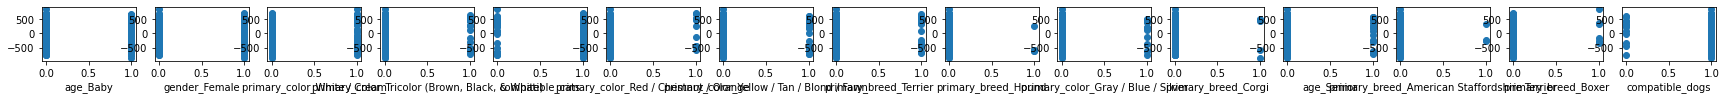

In [156]:
plot_feats_residuals(Xtest, ytest, y_preds, feat_list=top_15_feats)

### Linear Regression on Top 5 Feature Importances from Test 2, 3, and 4
Using the top 5 important features from Test 2, the top 5 important features from Test 3, and the the top 5 important features from Test 4 as our x values, we will run a linear regression in order to determine the coefficients for each feature, and determine if the feature has a positive or negative influence on time to be adopted. 

In [108]:
# combine lists of top 5 features from Tests 2-4 into one list 
test2_topfeats = ['primary_breed_Dutch Shepherd', 'primary_breed_Schnauzer', 'primary_breed_American Bulldog',
                 'primary_breed_Shih Tzu', 'primary_breed_Standard Poodle']
test3_topfeats = ['primary_color_Brown / Chocolate', 'primary_color_Brindle', 'primary_color_Harlequin',
                 'primary_color_Gray / Blue / Silver', 'primary_color_Merle (Blue)']
test4_topfeats = ['compatible_cats', 'coat_Medium', 'size_Large', 'coat_Short',  'size_Medium']
topfeats_tests = test2_topfeats + test3_topfeats + test4_topfeats

In [109]:
# create X and Y arrays
X = dogs_df_dummies[topfeats_tests].to_numpy()
y = dogs_df_dummies['delta_time_minutes'].to_numpy()

# split train and test data 
crossval_dogs = train_test_split(X, y, test_size=0.3)
Xtrain, Xtest, ytrain, ytest = crossval_dogs

# initialize model 
train_model_dogs = LinearRegression()

# fit model
train_model_dogs.fit(Xtrain, ytrain)

# get the predictions for the test set
y_preds = train_model_dogs.predict(Xtest)

# get the mse
mse = np.mean((ytest - y_preds) ** 2)

# get the cross validated R^2
r2 = r2_score(ytest, y_preds)

# print out the mse and r2 
print(f'''The MSE for the sklearn cross validated model is {mse}\nThe R2 score for the sklearn cross validated model is {round(r2, 4)}''')

The MSE for the sklearn cross validated model is 240664.68515433316
The R2 score for the sklearn cross validated model is 0.0146


In [110]:
train_model_dogs.coef_

array([-159.60760121, -412.66088452,  320.0174529 ,  122.73476875,
         25.64327215, -126.18182458, -165.53130772, -601.12169999,
        158.51001955,  157.55963947,  -79.97000987, -131.53826642,
         29.66089803, -113.81634679,  -72.58020739])

### Linear Regresson on Features Based on Intution

##### Trial 1: 
'compatible_children', 'compatible_dogs', 'compatible_cats', 'age_Adult', 
                   'age_Baby', 'age_Senior', 'gender_Female', 'gender_Male', 'size_Medium', 'coat_Hairless', 
                    'coat_Medium','primary_breed_Labrador Retriever', 'primary_breed_Maltese',
                    'primary_color_Black','primary_color_Brown / Chocolate', 'primary_color_White / Cream', 
                   'primary_color_Yellow / Tan / Blond / Fawn'

In [116]:
intuition_feats = ['compatible_children', 'compatible_dogs', 'compatible_cats', 'age_Adult', 
                   'age_Baby', 'age_Senior', 'gender_Female', 'gender_Male', 'size_Medium', 'coat_Hairless', 
                    'coat_Medium','primary_breed_Labrador Retriever', 'primary_breed_Maltese',
                    'primary_color_Black','primary_color_Brown / Chocolate', 'primary_color_White / Cream', 
                   'primary_color_Yellow / Tan / Blond / Fawn']
# create X and Y arrays
X = dogs_df_dummies[intuition_feats].to_numpy()
y = dogs_df_dummies['delta_time_minutes'].to_numpy()

# split train and test data 
crossval_dogs = train_test_split(X, y, test_size=0.3)
Xtrain, Xtest, ytrain, ytest = crossval_dogs

# initialize model 
train_model_dogs = LinearRegression()

# fit model
train_model_dogs.fit(Xtrain, ytrain)

# get the predictions for the test set
y_preds = train_model_dogs.predict(Xtest)

# get the mse
mse = np.mean((ytest - y_preds) ** 2)

# get the cross validated R^2
r2 = r2_score(ytest, y_preds)

# print out the mse and r2 
print(f'''The MSE for the sklearn cross validated model is {mse}\nThe R2 score for the sklearn cross validated model is {round(r2, 4)}''')

The MSE for the sklearn cross validated model is 5.957043800137376e+28
The R2 score for the sklearn cross validated model is -2.5769120809250694e+23


In [117]:
train_model_dogs.coef_

array([-1.02109931e+00, -1.44708844e+02, -2.91137972e+01,  6.82957333e+01,
        7.14086388e+01,  4.26266156e+01, -5.09506812e+16, -5.09506812e+16,
       -9.26300039e+01, -4.35240155e+15, -3.42942039e+01, -9.70679369e+01,
       -2.38778528e+02, -1.44134058e+00, -1.52717815e+02,  1.16147954e+01,
        3.06831113e+01])

##### Trial 2: 
'compatible_children', 'compatible_dogs', 'compatible_cats', 'age_Adult', 
                   'age_Baby', 'age_Senior', 'gender_Female', 'gender_Male', 'size_Medium', 
                   'size_Small', 'size_Large'

In [138]:
intuition_feats = ['compatible_children', 'compatible_dogs', 'compatible_cats', 'age_Adult', 
                   'age_Baby', 'age_Senior', 'gender_Female', 'gender_Male', 'size_Medium', 
                   'size_Small', 'size_Large']
# create X and Y arrays
X = dogs_df_dummies[intuition_feats].to_numpy()
y = dogs_df_dummies['delta_time_minutes'].to_numpy()

# split train and test data 
crossval_dogs = train_test_split(X, y, test_size=0.3)
Xtrain, Xtest, ytrain, ytest = crossval_dogs

# initialize model 
train_model_dogs = LinearRegression()

# fit model
train_model_dogs.fit(Xtrain, ytrain)

# get the predictions for the test set
y_preds = train_model_dogs.predict(Xtest)

# get the mse
mse = np.mean((ytest - y_preds) ** 2)

# get the cross validated R^2
r2 = r2_score(ytest, y_preds)

# print out the mse and r2 
print(f'''The MSE for the sklearn cross validated model is {mse}\nThe R2 score for the sklearn cross validated model is {round(r2, 4)}''')

The MSE for the sklearn cross validated model is 244733.42958420684
The R2 score for the sklearn cross validated model is 0.004


In [139]:
train_model_dogs.coef_

array([ 9.46868085e+01, -2.02992054e+01, -9.80332094e+01,  3.72597966e+01,
        2.25432131e+01,  4.93691505e+01, -2.06677181e+16, -2.06677181e+16,
       -1.24035820e+02, -3.89363741e+01, -4.93911727e+01])

/var/folders/92/y7rgwc2x2r10kszglxcqjdy40000gn/T/ipykernel_66807/1135779805.py:30: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations

/var/folders/92/y7rgwc2x2r10kszglxcqjdy40000gn/T/ipykernel_66807/1135779805.py:37: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



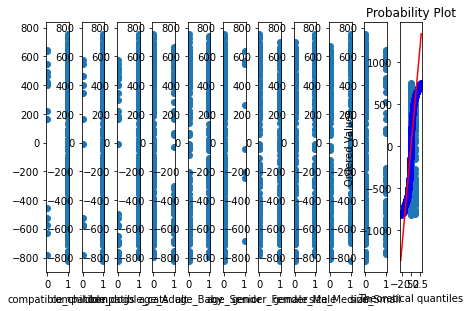

In [140]:
plot_residuals(Xtest, ytest, y_preds, feat_list=intuition_feats)

/var/folders/92/y7rgwc2x2r10kszglxcqjdy40000gn/T/ipykernel_66807/1130254043.py:24: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



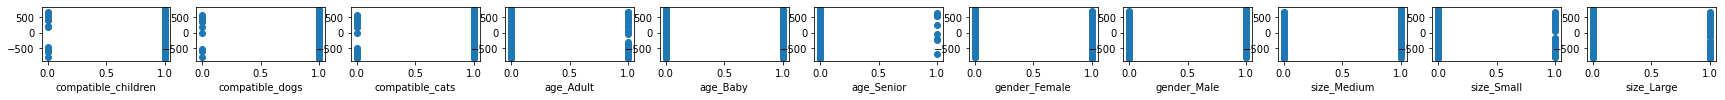

In [151]:
plot_feats_residuals(Xtest, ytest, y_preds, feat_list=intuition_feats)

NameError: name 'top15_feats' is not defined